# Project #3
_____

# Pre-Processing and Feature Engineering 
> Author: Si|via Resende

---

Continuing the processing, we vectorize all documents ('selftext' content posts) from dataset using TdifVectorizer(). This algorithm works in a different way than CountVectorizer(), putting different weights for the occurrence of each token considering overall document. It weights the word counts by a measure of how often they appear in the documents. To set this vectorizer, we set two main parameters as stop_words = ‘english’ and ngram_range = (1,3) . The first one, remove words without ‘meaning’ from our document and the second one look at the occurrence of one, two or three sequential words in the documents.

In [54]:
# Importing Librearies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px

In [55]:
subreddit = pd.read_csv('../data/subreddit_EDA.csv')
subreddit.drop(columns='Unnamed: 0', inplace=True)
df = subreddit.copy()
df.head()
#explain Like Im 5 = 0

,subreddit,tokens,selftext_length,selftext_word_count
0,OutOfTheLoop,"['last', 'i', 'heard', 'a', 'few', 'year', 'ba...",218,18
1,explainlikeimfive,"['so', 'a', 'year', 'ago', 'around', 'i', 'saw...",161,33
2,OutOfTheLoop,"['i', 've', 'seen', 'meme', 'of', 'peopl', 'in...",350,21
3,OutOfTheLoop,"['there', 's', 'a', 'lot', 'of', 'meme', 'onli...",84,11
4,OutOfTheLoop,"['i', 'found', 'out', 'there', 're', 'ban', 's...",426,46


In [56]:
df.shape

(3998, 4)

In [57]:
# binarizing
df['subreddit'] = df['subreddit'].map({'explainlikeimfive': 0 , 'OutOfTheLoop': 1 })
df.head(3)

,subreddit,tokens,selftext_length,selftext_word_count
0,1,"['last', 'i', 'heard', 'a', 'few', 'year', 'ba...",218,18
1,0,"['so', 'a', 'year', 'ago', 'around', 'i', 'saw...",161,33
2,1,"['i', 've', 'seen', 'meme', 'of', 'peopl', 'in...",350,21


In [58]:
X = df['tokens']
y = df['subreddit']
X.shape, y.shape

((3998,), (3998,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
X_train.shape, X_test.shape

((2998,), (1000,))

In [60]:
y_train.value_counts()

1    1616
0    1382
Name: subreddit, dtype: int64

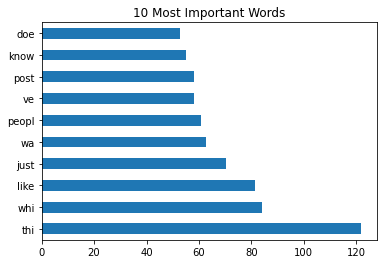

In [61]:
# Instantiate the transformer.
tvec = TfidfVectorizer( ngram_range=(1, 1), stop_words='english')

# Convert training data to dataframe
X_train_df_1gram = pd.DataFrame(
                                tvec.fit_transform(X_train).todense(), 
                                columns = tvec.get_feature_names_out()
                                )

# Plotting top importants words
X_train_df_1gram.sum().sort_values( ascending=False ).head(10).plot(kind='barh').set_title('10 Most Important Words');

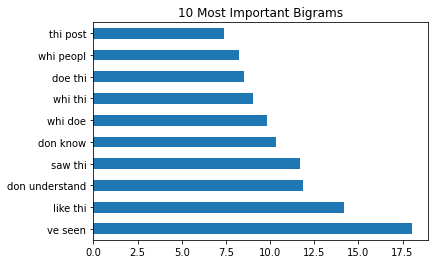

In [62]:
# Instantiate the transformer.
tvec = TfidfVectorizer( ngram_range=(2, 2),stop_words = 'english')

# Convert training data to dataframe
X_train_df_2gram = pd.DataFrame(
                                tvec.fit_transform(X_train).todense(), 
                                columns=tvec.get_feature_names_out()
                                )
# Plotting top importants words
X_train_df_2gram.sum().sort_values(ascending=False).head(10).plot(kind='barh').set_title('10 Most Important Bigrams');

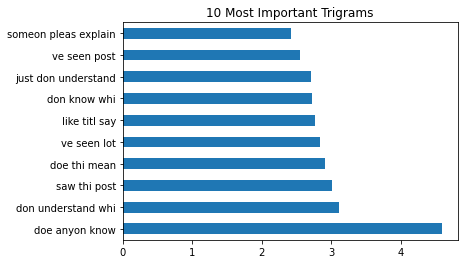

In [63]:
# Instantiate the transformer.
tvec = TfidfVectorizer( ngram_range=(3, 3),stop_words = 'english')

# Convert training data to dataframe
X_train_df_3gram = pd.DataFrame(
                            tvec.fit_transform(X_train).todense(), 
                            columns=tvec.get_feature_names_out()
                            )
# Plotting top importants words
X_train_df_3gram.sum().sort_values(ascending=False).head(10).plot(kind='barh').set_title('10 Most Important Trigrams');


In [64]:
X_train_df_1gram['subreddit'] = y_train.values
X_train_df_2gram['subreddit'] = y_train.values 
X_train_df_3gram['subreddit'] = y_train.values

In [65]:
serie_3gram = X_train_df_3gram.sum().sort_values(ascending=False).head(25)
list_3gram = list(serie_3gram.index)
list_3gram.remove('subreddit')
list_3gram

['doe anyon know',
 'don understand whi',
 'saw thi post',
 'doe thi mean',
 've seen lot',
 'like titl say',
 'don know whi',
 'just don understand',
 've seen post',
 'someon pleas explain',
 'just seen thi',
 'just saw thi',
 'post like thi',
 'thing like thi',
 'doe thi work',
 'thi big deal',
 'whi mani peopl',
 've seen mani',
 'whi doe thi',
 'whi thi happen',
 'did someth happen',
 've seen bunch',
 'anyon know happen',
 'know ha someth']

In [66]:
df_3gram = X_train_df_3gram.groupby(by='subreddit').sum()
df_3gram

,aa aaa size,aa observ remaind,aaa size batteri,aaden construct wall,aav sl uk,abandon basement pretti,abandon content alon,abandon eyebal ad,abandon recent wa,abbott littl piss,...,zoolog student gen,zoom notic thi,zoophil servic societi,zuckerberg action hi,zuckerberg ha caus,zyurang becaus train,zyzz wonder wa,ôn social web,þat instead advoc,博衣こよりd hashtag trend
subreddit,,,,,,,,,,,,,,,,,,,,,
0,0.219308,0.196116,0.219308,0.149337,0.0,0.188982,0.000000,0.000000,0.188982,0.000000,...,0.183211,0.288675,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.224141,0.156355,0.000000,0.213201,...,0.000000,0.000000,0.288675,0.154303,0.154303,0.185695,0.25,0.180718,0.170516,0.186308


In [67]:
ngrams = [] 
for i in list_3gram:
    if (df_3gram.loc[0,i]!=0) and (df_3gram.loc[1,i]!=0):
        ngram = {}
        ngram['word']= i
        ngram['value_0'] = df_3gram.loc[0,i]
        ngram['value_1'] = df_3gram.loc[1,i]
        ngrams.append(ngram)
df_ngrams = pd.DataFrame(ngrams)
df_ngrams.shape

(15, 3)

In [68]:
df_barchart = df_ngrams.copy()
df_barchart.set_index('word').sort_values(by='value_1', ascending=False)

,value_0,value_1
word,,
doe anyon know,0.492017,4.092640
saw thi post,0.167028,2.847290
ve seen lot,0.119176,2.719830
doe thi mean,0.817023,2.083983
don know whi,0.785268,1.929924
don understand whi,1.300672,1.805475
thing like thi,0.253142,1.541798
someon pleas explain,1.086246,1.327627
whi thi happen,0.172385,1.308449


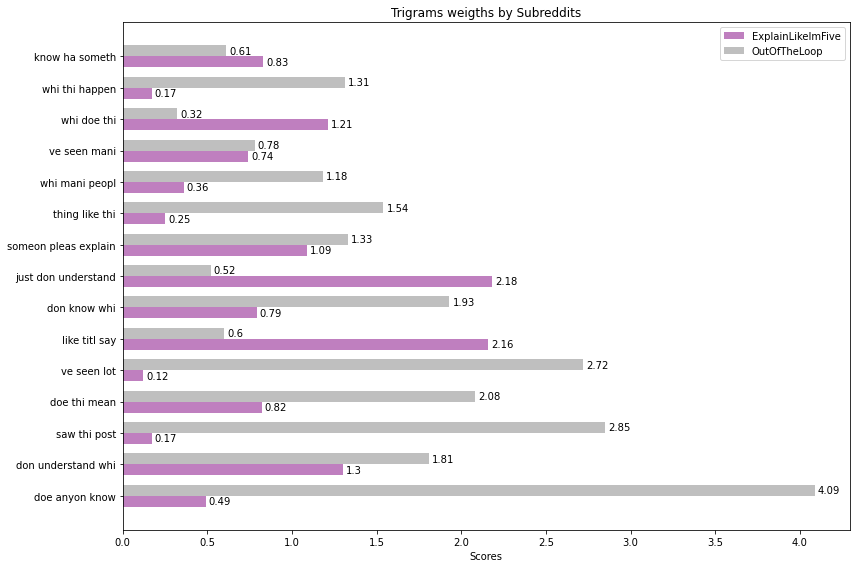

In [69]:
# Plotting 
labels = [row for row in df_ngrams['word']]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(12,8)
rects1 = ax.barh(x - width/2, round(df_barchart['value_0'],2), width, label='ExplainLikeImFive', color='Purple', alpha = 0.5)
rects2 = ax.barh(x + width/2, round(df_barchart['value_1'],2), width, label='OutOfTheLoop', color='Grey', alpha = 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('Trigrams weigths by Subreddits')
ax.set_yticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.xticks(rotation = 0)
plt.show()

In [70]:
# Explain like I'm Five

fig1 = px.scatter(
        df_ngrams, x = 'word', y = 'value_0', 
        hover_name = 'word', text='word', size='value_0',  size_max=45, 
        template = 'plotly_white', 
        title = 'Trigram Similarity | Explain Like Im Five', 
        labels={'value_1': 'Avg. Length<BR>(words)'}, 
        color_discrete_sequence = ['purple'],
        opacity=0.5
        #color_continuous_scale = 'red' #px.colors.sequential.Blackbody
        )
fig1.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig1.update_xaxes(visible=False)
fig1.update_yaxes(visible=False)
fig1.show();
